Connecting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing libraries for creating embeddings

In [ ]:
from keras.applications.inception_v3 import preprocess_input
import pickle 
import numpy as np
import keras
from keras.applications import InceptionV3
import os

Download and unzip COCO training and validation set. Make sure to remove the zip files after extraction to save space.

In [ ]:
!wget http://images.cocodataset.org/zips/train2014.zip

--2022-12-02 22:09:24--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.137.161, 52.217.170.145, 3.5.17.132, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.137.161|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  29.6MB/s    in 7m 10s  

2022-12-02 22:16:34 (30.0 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]



In [ ]:
!wget http://images.cocodataset.org/zips/val2014.zip

--2022-12-02 22:22:57--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.135.249, 52.216.162.163, 52.217.168.121, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.135.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  34.2MB/s    in 8m 42s  

2022-12-02 22:31:40 (12.1 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [ ]:
!unzip train2014.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2014/COCO_train2014_000000408557.jpg  
 extracting: train2014/COCO_train2014_000000013714.jpg  
 extracting: train2014/COCO_train2014_000000194043.jpg  
 extracting: train2014/COCO_train2014_000000219859.jpg  
 extracting: train2014/COCO_train2014_000000278135.jpg  
 extracting: train2014/COCO_train2014_000000141015.jpg  
 extracting: train2014/COCO_train2014_000000280923.jpg  
 extracting: train2014/COCO_train2014_000000200024.jpg  
 extracting: train2014/COCO_train2014_000000435713.jpg  
 extracting: train2014/COCO_train2014_000000249993.jpg  
 extracting: train2014/COCO_train2014_000000424160.jpg  
 extracting: train2014/COCO_train2014_000000142761.jpg  
 extracting: train2014/COCO_train2014_000000532668.jpg  
 extracting: train2014/COCO_train2014_000000564904.jpg  
 extracting: train2014/COCO_train2014_000000346384.jpg  
 extracting: train2014/COCO_train2014_000000560934.jpg  
 extracting: train2014/COCO_train2014

In [ ]:
!unzip val2014.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2014/COCO_val2014_000000535608.jpg  
 extracting: val2014/COCO_val2014_000000279145.jpg  
 extracting: val2014/COCO_val2014_000000243495.jpg  
 extracting: val2014/COCO_val2014_000000225791.jpg  
 extracting: val2014/COCO_val2014_000000428067.jpg  
 extracting: val2014/COCO_val2014_000000059383.jpg  
 extracting: val2014/COCO_val2014_000000558498.jpg  
 extracting: val2014/COCO_val2014_000000376123.jpg  
 extracting: val2014/COCO_val2014_000000191304.jpg  
 extracting: val2014/COCO_val2014_000000171062.jpg  
 extracting: val2014/COCO_val2014_000000014549.jpg  
 extracting: val2014/COCO_val2014_000000121152.jpg  
 extracting: val2014/COCO_val2014_000000276596.jpg  
 extracting: val2014/COCO_val2014_000000029431.jpg  
 extracting: val2014/COCO_val2014_000000036349.jpg  
 extracting: val2014/COCO_val2014_000000502055.jpg  
 extracting: val2014/COCO_val2014_000000438848.jpg  
 extracting: val2014/COCO_val2014_000000364973.j

In [ ]:
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: /content


In [ ]:
!gdown 1-0Acd7hXEI3Rs8J8FzxHNNATTD4EQZzD
!gdown 1ScBD6GoDkE1pGy9RC1J-SR-eGQHCGGHI
!gdown 1PmDHSkd50Zy1VYVS-uIHr9T_jTWvbynF
!gdown 1-0bgVSJXG5WaBpuMfK4buhA0muOT-YaH

Downloading...
From: https://drive.google.com/uc?id=1-0Acd7hXEI3Rs8J8FzxHNNATTD4EQZzD
To: /content/val_img_embeds.pickle
100% 41.0M/41.0M [00:00<00:00, 71.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ScBD6GoDkE1pGy9RC1J-SR-eGQHCGGHI
To: /content/train_img_fns.pickle
100% 204k/204k [00:00<00:00, 114MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PmDHSkd50Zy1VYVS-uIHr9T_jTWvbynF
To: /content/train_img_embeds.pickle
100% 41.0M/41.0M [00:00<00:00, 54.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0bgVSJXG5WaBpuMfK4buhA0muOT-YaH
To: /content/val_img_fns.pickle
100% 194k/194k [00:00<00:00, 130MB/s]


In [ ]:
from keras.utils import load_img,img_to_array
import os
# inception model is loaded
img_model = InceptionV3(include_top=False)
# parameter to make it 1 dimensional feature 
img_model = keras.engine.training.Model(img_model.inputs, keras.layers.GlobalAveragePooling2D()(img_model.output))

data_dir = os.listdir('train2014/')
print(len(data_dir))
imgs = []
file_names = []

for filename in data_dir[:5000]:
  # read image
  image = load_img('train2014/'+filename, target_size=(229, 229))
  # image to num py
  image = img_to_array(image)
 
  imgs.append(image)
  file_names.append(filename)
  
batch_image = np.array(imgs)



image = preprocess_input(batch_image)
#predictions model
pred = img_model.predict(batch_image)
print(pred.shape)
with open('train_img_embeds.pickle', 'wb') as f:
    pickle.dump(pred, f)
with open('train_img_fns.pickle','wb') as f:
  pickle.dump(file_names,f)

87910968/87910968 [==============================] - 4s 0us/step
82783
157/157 [==============================] - 19s 64ms/step
(5000, 2048)


In [ ]:
from keras.utils import load_img,img_to_array
# for val dataset similar steps as for training in prvious cell
import os
data_dir = os.listdir('val2014/')
print(len(data_dir))
imgs = []
file_names = []
for filename in data_dir[:5000]:
  
    image = load_img('val2014/'+filename, target_size=(229, 229))
    
    image = img_to_array(image)
    imgs.append(image)
    file_names.append(filename)
  
batch_image = np.array(imgs)


image = preprocess_input(batch_image)

pred = img_model.predict(batch_image)
print(pred.shape)
with open('val_img_embeds.pickle', 'wb') as f:
    pickle.dump(pred, f)
with open('val_img_fns.pickle','wb') as f:
  pickle.dump(file_names,f)

40504
157/157 [==============================] - 9s 60ms/step
(5000, 2048)


Reload runtime to free RAM

In [ ]:
import numpy as np
#import tensorflow as tf 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import keras.backend as K
import keras.layers as L
import keras
from collections import defaultdict, Counter
import json
import pickle
import os
from nltk.tokenize import RegexpTokenizer
from skimage.io import imread
from skimage.transform import resize

%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
!gdown 1PmDHSkd50Zy1VYVS-uIHr9T_jTWvbynF
!gdown 1ScBD6GoDkE1pGy9RC1J-SR-eGQHCGGHI
!gdown 1-0Acd7hXEI3Rs8J8FzxHNNATTD4EQZzD
!gdown 1-0bgVSJXG5WaBpuMfK4buhA0muOT-YaH

Downloading...
From: https://drive.google.com/uc?id=1PmDHSkd50Zy1VYVS-uIHr9T_jTWvbynF
To: /content/train_img_embeds.pickle
100% 41.0M/41.0M [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ScBD6GoDkE1pGy9RC1J-SR-eGQHCGGHI
To: /content/train_img_fns.pickle
100% 204k/204k [00:00<00:00, 63.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0Acd7hXEI3Rs8J8FzxHNNATTD4EQZzD
To: /content/val_img_embeds.pickle
100% 41.0M/41.0M [00:00<00:00, 204MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1-0bgVSJXG5WaBpuMfK4buhA0muOT-YaH
To: /content/val_img_fns.pickle
100% 194k/194k [00:00<00:00, 109MB/s]


In [ ]:
# load training image features
#with open('/content/gdrive/MyDrive/NLP_model/train_img_embeds.pickle', 'rb') as f:
with open('/content/train_img_embeds.pickle', 'rb') as f:  
    train_img_x = pickle.load(f)
# load the image file names
#with open('/content/gdrive/MyDrive/NLP_model/train_img_fns.pickle', 'rb') as f:
with open('/content/train_img_fns.pickle', 'rb') as f:
    train_img_fn = pickle.load(f)
    
# load validation image features
#with open('/content/gdrive/MyDrive/NLP_model/val_img_embeds.pickle', 'rb') as f:
with open('/content/val_img_embeds.pickle', 'rb') as f:
    val_img_x = pickle.load(f)
# load the validation image filenames
#with open('/content/gdrive/MyDrive/NLP_model/val_img_fns.pickle', 'rb') as f:
with open('/content/val_img_fns.pickle', 'rb') as f:  
    val_img_fn = pickle.load(f)
    
print('Training: ', (train_img_x.shape, len(train_img_fn)))
print('Validation: ', (val_img_x.shape, len(val_img_fn)))

Training:  ((5000, 2048), 5000)
Validation:  ((5000, 2048), 5000)


In [ ]:
print(train_img_fn[1:3])
print()
print(train_img_x[1:5,:])

['COCO_train2014_000000547164.jpg', 'COCO_train2014_000000337833.jpg']

[[0.10668169 0.52928764 0.19711378 ... 0.39156437 0.84154487 0.44274607]
 [1.3313005  0.1351636  0.49889424 ... 0.01447678 0.5691992  0.13351454]
 [1.0114474  0.45660126 1.5430691  ... 0.27938977 1.5823056  0.8808092 ]
 [0.14798701 0.5509804  0.21521527 ... 0.03405381 0.8089885  0.5779571 ]]


In [ ]:
'''
    loads captions for images
'''
def load_captions(filename, img_fn):
    '''
    img_fnames: img file names
    filename: complete address of json file to load
    '''
    
    # load the json annotations file
    # ann contains three keys: info, images, licenses, annotations
    # info: contains info about image, its fullname name, id, h, w , url
    # annotations: caption, id, image_id
    with open(filename, 'r') as f:
        annotate = json.load(f)
        
    # we already have a list of image file names, so we make another
    # list which contains the captions for those images, each image has atleast 5
    # captions or more
    
    # mapping from img filename to img id
    fn_id = {d['file_name']:d['id'] for d in annotate['images']}
    
    # we first make a dict mapping for img file id to captions
    id_cap = defaultdict(list)
    for d in annotate['annotations']:
        id_cap[d['image_id']].append(d['caption'])
    
    # for storing the captions
    captions = []
    
    # make the caption list
    for file_name in img_fn:
        captions.append(id_cap[fn_id[file_name]])    
    
    return captions, {fname:id_cap[fn_id[fname]] for fname in fn_id.keys()}

Loading the captions

In [ ]:
!wget http://images.cocodataset.org/zips/Train\/\Val annotations.zip

--2022-12-02 22:37:40--  http://images.cocodataset.org/zips/Train/Val
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.56.33, 52.217.171.89, 52.216.51.129, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.56.33|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-12-02 22:37:40 ERROR 404: Not Found.

--2022-12-02 22:37:40--  http://annotations.zip/
Resolving annotations.zip (annotations.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘annotations.zip’


In [ ]:
!gdown 1rvapSQzMD2aaPlF7hGl4YTkNN5TjSeb6
!gdown 1ut8bozZ5t3rd3pxCMKa7jrjyd_agJWRs

Downloading...
From: https://drive.google.com/uc?id=1rvapSQzMD2aaPlF7hGl4YTkNN5TjSeb6
To: /content/captions_val2014[1].json
100% 32.4M/32.4M [00:00<00:00, 80.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ut8bozZ5t3rd3pxCMKa7jrjyd_agJWRs
To: /content/captions_train2014[1].json
100% 66.8M/66.8M [00:00<00:00, 99.1MB/s]


In [ ]:
train_cap, train_fn_cap = load_captions('/content/captions_train2014[1].json', train_img_fn)
#train_cap, train_fn_cap = load_captions('/content/gdrive/MyDrive/NLP_model/captions_train2014[1].json', train_img_fn)
print(len(train_cap))
val_cap, val_fn_cap = load_captions('/content/captions_val2014[1].json', val_img_fn)
#val_cap, val_fn_cap = load_captions('/content/gdrive/MyDrive/NLP_model/captions_val2014[1].json', val_img_fn)
print(len(val_cap))

5000
5000


In [ ]:
train_cap[0]

['A man in a diving suit carrying a surfboard.',
 'A man holding a surfboard, walking into the ocean.',
 'A man in a wet suite walking out in to the surf with a surfboard. ',
 'Man in a wetsuit taking his surfboard into the sea.',
 'An athlete carrying a surf board is walking into the water.']

82783 40504


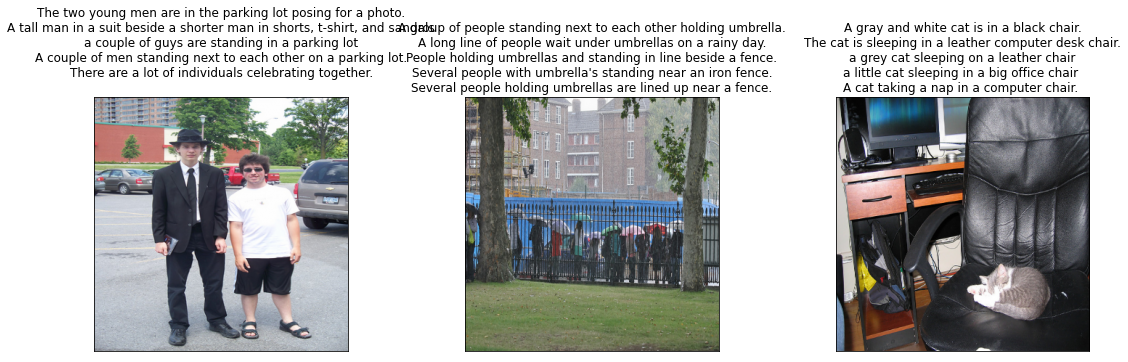

In [ ]:
# for visualizing training data
f_train = os.listdir('train2014/')
f_val = os.listdir('val2014/')
print(len(f_train), len(f_val))

# training example
fig = plt.figure(figsize=(15,15))
for i in range(3):
    img = imread('train2014/' + f_train[i])
    img = resize(img, (350,350))
    fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plt.tight_layout()
    plt.imshow(img)
    plt.title('\n'.join(train_fn_cap[f_train[i]]))
plt.show()

In [ ]:
'''
    Builds vocabulary dict
'''
def create_text_utils(captions):
    
    # make list of unique tokens
    word_freq = Counter((' '.join([sent for capt_i in captions for sent in capt_i ])).split())
    # keep only top 6000 words 
    word_freq = word_freq.most_common(8000)
    
    # vocabulary list
    vocab,_ = list(zip(*word_freq))
    vocab = ['<UNK>','<PAD>','<EOS>','<START>'] + list(vocab)
    
    # make a vocabulary dictionary: word to index
    word_to_idx = defaultdict(int, {word:i for i,word in tqdm(enumerate(vocab))})
    
    # reverse dict
    idx_to_word = {word_to_idx[key]:key for key in word_to_idx.keys()}
    
    return word_to_idx, idx_to_word

In [ ]:
# create the necessary mappings
word_to_idx, idx_to_word = create_text_utils(train_cap)

8004it [00:00, 1996503.67it/s]


In [ ]:
# tokenizes the captions
def tokenize_captions(captions):
    # tokenize the sentences
    word_tokenizer = RegexpTokenizer(r'\w+')
    
    # tokenize captions
    captions_tokenized = []
    for i in range(len(captions)):
        captions_tokenized.append([])
        for j in range(len(captions[i])):
            captions_tokenized[i].append(word_tokenizer.tokenize(captions[i][j].lower()))
    
    return captions_tokenized

In [ ]:
# tokenize captions
train_cap = tokenize_captions(train_cap)

In [ ]:
# converts the string captions to its index representation and pads the caption
# if the size of a particular caption is less than the max length
def convert_to_num(captions, word_to_idx):
    
    # words to indices
    word_idx = []
    for i in range(len(captions)):
        word_idx.append([])
        for sent in captions[i]:
            word_idx[i].append([word_to_idx['<START>']] + [word_to_idx[word]
                                                           for word in sent] +
                              [word_to_idx['<EOS>']])
    
    return np.array(word_idx)

In [ ]:
# adds padding to the numerical representaion of captions
# all the captions of all the examples in the arg batch are padded according to 
# the longest caption in the batch
def add_padding(word_idx):
    '''
        word_idx: (list(list)) list containing captions in indexed form as list.
    '''
    # find the maximum length amongst all the captions
    max_len = -99999999
   
    max_len = max(map(len, word_idx))
    
    # Padded representation
    pad = np.empty((len(word_idx), max_len), dtype='int64')
    pad.fill(word_to_idx[''])
    
    for i in range(len(word_idx)):
        #print(word_idx[i])
        pad[i,:len(word_idx[i])] = word_idx[i]
    
    return np.array(pad)

In [ ]:
# convert the training captions to numerical index representation
train_cap = convert_to_num(train_cap, word_to_idx)

<ipython-input-24-b7f74c66778a>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(word_idx)


In [ ]:
train_cap[0]

[[3, 4, 13, 8, 4, 2592, 277, 281, 4, 178, 2],
 [3, 4, 13, 24, 4, 178, 54, 132, 9, 321, 2],
 [3, 4, 13, 8, 4, 600, 2959, 54, 87, 8, 14, 9, 253, 10, 4, 178, 2],
 [3, 13, 8, 4, 1206, 187, 32, 178, 132, 9, 1398, 2],
 [3, 20, 2960, 281, 4, 253, 127, 12, 54, 132, 9, 86, 2]]

In [ ]:
add_padding(train_cap[0])

array([[   3,    4,   13,    8,    4, 2592,  277,  281,    4,  178,    2,
           0,    0,    0,    0,    0,    0],
       [   3,    4,   13,   24,    4,  178,   54,  132,    9,  321,    2,
           0,    0,    0,    0,    0,    0],
       [   3,    4,   13,    8,    4,  600, 2959,   54,   87,    8,   14,
           9,  253,   10,    4,  178,    2],
       [   3,   13,    8,    4, 1206,  187,   32,  178,  132,    9, 1398,
           2,    0,    0,    0,    0,    0],
       [   3,   20, 2960,  281,    4,  253,  127,   12,   54,  132,    9,
          86,    2,    0,    0,    0,    0]])

In [ ]:
## find the length of longest caption 
max_len = -999999
for i in range(len(train_cap)):
    curr_max = max(map(len, train_cap[i]))
    max_len = max(max_len, curr_max)
print(max_len)

51


Model hyperparameters

In [ ]:
# no. of hidden state units
STATE_SIZE = 300
# dimension of word embedding to produce
WORD_EMBED_SIZE = 128
# dimension of encoding vector
IMG_ENC_SIZE = train_img_x.shape[1]
# batch size
BATCH_SIZE=512
# no. of batches to produce for 1 epoch
STEPS_PER_EPOCH = len(train_img_x)/BATCH_SIZE
# length of vocabulary
VOCAB_LEN = len(word_to_idx)
STEPS_PER_EPOCH

9.765625

data generator

In [ ]:
'''
    for generating random batches for model training
    train_img_x: numpy array containing img encoding values of shape(2048) for m examples
    train_cap: list of list ,training captions with each caption represented as 
                list of indices of the corresponding word
'''
def generate_model_batch(batch_size=BATCH_SIZE):
    while True:
        # pick out random indices for the batch
        indices = np.random.choice(len(train_img_x), batch_size, replace=False)
        # get the random batch of images
        batch_img_x = train_img_x[indices]
        # get the random batch of training captions
        # Since each image has atleast 5 captions, so we select randomly one each time
        batch_captions = [train_cap[idx][np.random.randint(5)] for idx in indices ]
        # now we pad the captions to equal length

        batch_captions = add_padding(batch_captions)

        # now the model gets two inputs: image encodings and captions
        # the output is captions shifted by one timestep
        # so to make things easier we send them as dict
        train_x = {
            'decoder_input': batch_captions[:, :-1],
            'hidden_state_input': batch_img_x
        }

        train_y = {
            'decoder_output': batch_captions[:, 1:]
        }

        yield (train_x, train_y)

In [ ]:
data_generator = generate_model_batch(batch_size=BATCH_SIZE)

In [ ]:
# check out the generated content
batch = next(data_generator)
batch_x = batch[0]
batch_y = batch[1]
print(batch_x)
print()
print(batch_y)

{'decoder_input': array([[  3,   4,  57, ...,   0,   0,   0],
       [  3,   4,  13, ...,   0,   0,   0],
       [  3,   4,  49, ...,   0,   0,   0],
       ...,
       [  3,   9,  41, ...,   0,   0,   0],
       [  3,   4,  13, ...,   0,   0,   0],
       [  3,   4, 146, ...,   0,   0,   0]]), 'hidden_state_input': array([[0.09298578, 0.26272193, 0.27791592, ..., 0.00932212, 0.7939265 ,
        0.43449897],
       [0.41369274, 0.15970933, 0.75350225, ..., 0.49772438, 0.3404497 ,
        0.20444725],
       [1.3619924 , 0.60162586, 0.12708566, ..., 0.73940194, 1.1512989 ,
        0.42261475],
       ...,
       [0.3353161 , 0.22009088, 0.18534127, ..., 0.04883987, 0.7859748 ,
        0.32829666],
       [0.29609168, 0.4944471 , 0.30057347, ..., 0.24463831, 0.35556835,
        0.882795  ],
       [0.13656738, 0.25648925, 1.1538997 , ..., 0.1410176 , 0.47973728,
        2.4116106 ]], dtype=float32)}

{'decoder_output': array([[  4,  57,  92, ...,   0,   0,   0],
       [  4,  13,   0, ..

In [ ]:
from keras.layers import Input, Embedding, Dense, LSTM, GRU
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.utils import load_img, img_to_array

In [ ]:
# for taking the image encodings
hidden_state_input = Input(shape=(IMG_ENC_SIZE,), name='hidden_state_input')

# for converting the image encodings to desirable size matching the
# no. of LSTM hidden units
hidden_state_values = Dense(STATE_SIZE, activation='tanh',
                           name='hidden_state_values')

# for taking the captions as input
# None for the shape means that the length is not fixed for the captions
decoder_input = Input(shape=(None, ), name='decoder_input')

# For getting the embeddings out of captions
embedding_layer = Embedding(input_dim=VOCAB_LEN, output_dim=WORD_EMBED_SIZE,
                           name='embedding_layer')

# We will be using two layered LSTM network
# each layer needs to return the output sequence for the next layer stack
lstm_layer1 = LSTM(STATE_SIZE, name='lstm_layer1', return_sequences=True)
lstm_layer2 = LSTM(STATE_SIZE, name='lstm_layer2', return_sequences=True)

# the final output of the LSTM layer will pass through a dense layer
# Instead of using softmax loss, which would require the ground truth labels
# to be represented in One hot representation of length equal to vocabulary size, 
# we can use the sparse entropy loss, which internally converts the labels for 
# computing the loss, for that we need to write a custom loss, as the keras implementation 
# has bug issues with that.
decoder_dense_output = Dense(VOCAB_LEN, activation='linear', name='decoder_output')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# add captions as input
caption_input = decoder_input
# connect embedding layer
caption_embeds = embedding_layer(caption_input)
# Initial hidden state
hidden_ini_states = hidden_state_values(hidden_state_input)

# pass the embeddings to the LSTM network
lstm1 = lstm_layer1(caption_embeds, initial_state=[hidden_ini_states,hidden_ini_states])
lstm2 = lstm_layer2(lstm1, initial_state=[hidden_ini_states,hidden_ini_states])

# pass the lstm output to dense layer
decoder_output = decoder_dense_output(lstm2)

# create keras model instance
model = Model(inputs=[hidden_state_input, decoder_input], 
                     outputs=[decoder_output])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 decoder_input (InputLayer)     [(None, None)]       0           []                               
                                                                                                  
 hidden_state_input (InputLayer  [(None, 2048)]      0           []                               
 )                                                                                                
                                                                                                  
 embedding_layer (Embedding)    (None, None, 128)    1339008     ['decoder_input[0][0]']          
                                                                                                  
 hidden_state_values (Dense)    (None, 300)          614700      ['hidden_state_input[0][0]'

In [ ]:
'''
    Computes cross entropy loss between true labels(y_true) and predicted labels(y_pred)
'''
def sparse_cross_entropy(y_true, y_pred):
    
    # computes loss and outputs [batch_size, sequence_length] tensor
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true,
                                                         logits=y_pred)
    mean_loss = tf.reduce_mean(loss)
    
    return mean_loss

In [ ]:
def binary_crossentropy(y_true, y_pred):
    return K.mean(K.binary_crossentropy(y_true, y_pred), axis=-1)

In [ ]:
#tf.disable_v2_behavior() 
tf.config.run_functions_eagerly(False)
tf.compat.v1.disable_eager_execution()

Model Training

In [ ]:
# optimizer for the model
optimizer = RMSprop(lr=1e-3)

# for saving the weights 
checkpoint = ModelCheckpoint('checkpoint.keras', verbose=1,
                             save_weights_only=True)

# output dimensions for the model
# (bacth_size, arbitary sequence_length)
#issue
model_target = tf.placeholder(shape=(None, None), dtype='int64')
#model_target = tf.Variable(tf.ones(shape=(0, 0)), dtype='float32')
tf.config.run_functions_eagerly(False)
# compile the model with all this info
model.compile(optimizer=optimizer, loss=sparse_cross_entropy, target_tensors=[model_target])
#model.compile(optimizer='rmsprop',
#              loss='binary_crossentropy', target_tensors=[model_target] ,
#              metrics=['accuracy'])
# metrics=['mae'])
          #    metrics=['mse', 'mae', 'mape'])
#model.add_metric(tf.keras.metrics.Mean(name='mean_1'))
#model.compile(optimizer='sgd', loss='mse', target_tensors=[model_target], metrics=[tf.keras.metrics.Hinge()])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# load if model is found
#file_path = '/content/gdrive/MyDrive/NLP_model/checkpoint.keras'
file_path = '/content/checkpoint.keras'
try:
    model.load_weights(file_path)
    print('Model weights loaded successfully')
except :
    print("Error !!.")

Error !!.


In [ ]:

#hist = model.fit(generate_model_batch(batch_size=BATCH_SIZE), steps_per_epoch=STEPS_PER_EPOCH, epochs=100, verbose=1,callbacks=[checkpoint])

hist = model.fit_generator(generator=generate_model_batch(batch_size=BATCH_SIZE),
                   steps_per_epoch=STEPS_PER_EPOCH,
                   epochs=1000, verbose=1, 
                   callbacks=[checkpoint])


Epoch 1/1000


<ipython-input-53-b6f874efbd1f>:3: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=generate_model_batch(batch_size=BATCH_SIZE),


10/9 [==============================] - ETA: 0s - batch: 4.5000 - size: 512.0000 - loss: 0.2014
Epoch 1: saving model to checkpoint.keras
9/9 [==============================] - 3s 265ms/step - batch: 4.5000 - size: 512.0000 - loss: 0.2014
Epoch 2/1000
10/9 [==============================] - ETA: 0s - batch: 4.5000 - size: 512.0000 - loss: 0.1820
Epoch 2: saving model to checkpoint.keras
9/9 [==============================] - 2s 247ms/step - batch: 4.5000 - size: 512.0000 - loss: 0.1820
Epoch 3/1000
10/9 [==============================] - ETA: 0s - batch: 4.5000 - size: 512.0000 - loss: 0.2188
Epoch 3: saving model to checkpoint.keras
9/9 [==============================] - 2s 241ms/step - batch: 4.5000 - size: 512.0000 - loss: 0.2188
Epoch 4/1000
10/9 [==============================] - ETA: 0s - batch: 4.5000 - size: 512.0000 - loss: 0.2653
Epoch 4: saving model to checkpoint.keras
9/9 [==============================] - 2s 212ms/step - batch: 4.5000 - size: 512.0000 - loss: 0.2653
Epoch

In [ ]:
#hist = model.fit(batch_x, steps_per_epoch=STEPS_PER_EPOCH, epochs=20)

Results

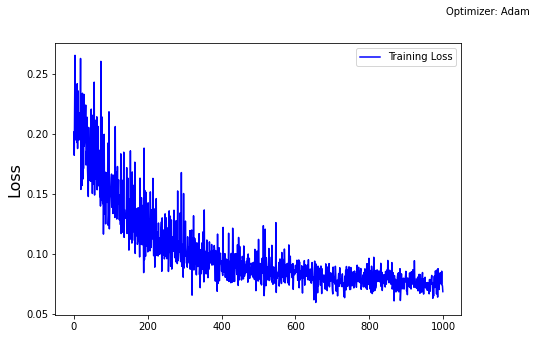

In [ ]:
# loss plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.suptitle('Optimizer: Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# load the pretrained inception model in keras
image_model = InceptionV3(include_top=False)
image_model = keras.engine.training.Model(image_model.inputs,
                                          keras.layers.GlobalAveragePooling2D()
                                          (image_model.output))

In [ ]:
'''
    Load and encode the input image 
'''
def encode_image(file_name=None, path=True, img=None):
    # load and resize the image only when the path is provided
    if path:
        # read image
        img = load_img(file_name, target_size=(229, 229))
        # convert to numpy array
        img = img_to_array(img)
    
    # add another dimension that can act as the batch size 
    img = np.expand_dims(img, axis=0)
    # preprocess image
    img = preprocess_input(img)
    # get the model predictions
    pred = image_model.predict(img)
    
    return pred

In [ ]:
"""
    Generates caption for the input image
"""
def generate_caption(image_path=None, max_tokens=35, path=True, img=None):
    
    # predicted caption for the input image
    caption = []
    # starting token
    curr_token = word_to_idx['<START>']
    # counter for the no. of words sampled
    token_counter = 0
    # <EOS> token index
    eos = word_to_idx['<EOS>']
    
    # if image path is provided
    if path == True:
        # get image encodings
        img_x = encode_image(file_name=image_path, path=True, img=None)
    else:
        # get image encodings
        img_x = encode_image(file_name=None, path=False, img=img)
        
    # dummy numpy array to feed to the model
    model_input_caption = np.empty(shape=(1, max_len), dtype='int64')
    # fill the input with padding
    model_input_caption.fill(word_to_idx['PAD'])

    # We will produce the caption by sampling. We start by feeding it <START> and the predicted
    # output word is then used as input for the next timestep. 
    # We do this till max_len is reached or <EOS> is encountered
    
    while curr_token != eos and token_counter < max_len:
        # For each word we feed the model the entire predicted sequence up till then
        # add the current token index in decoder input 
        model_input_caption[0, token_counter] = curr_token
        
        X = {
            'hidden_state_input': img_x,
            'decoder_input': model_input_caption
        }
        
        # predict the word 
        model_output = model.predict(X)
        
        # Since the output is One hot encoded, we pick the hot index 
        # get the current predicted word from one hot encoded output for the current timestep
        curr_token = np.argmax(model_output[0, token_counter, :])

        # add the currently predicted word
        caption.append(curr_token)

        token_counter += 1
         # check if last word is <EOS>
    if caption[-1] == eos:
        # remove the last <EOS> tag
        caption = caption[:-1]
    
    # convert the indices to words
    caption_word = [idx_to_word[idx] for idx in caption]
    
    return ' '.join(caption_word)

In [ ]:
!python -m spacy download en_core_web_md


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 1.7 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_md')

In [ ]:
files_val = os.listdir('val2014/')
idx = np.random.randint(len(files_val))
filename = files_val[idx]
val_fn_cap[files_val[idx]]
# read the image
img = load_img('val2014/'+filename, target_size=(229, 229))

# Plot the image.
plt.imshow(img)
plt.show()

# Print the predicted caption.
print("Predicted caption:")
output_text = generate_caption(image_path='val2014/'+filename, path=True, img=None)
print(output_text)
print("Annotation:")
annotation = val_fn_cap[f_val[idx]][0]
print(annotation)
print("similarity:")
print(nlp(output_text).similarity(nlp(annotation)))
print()

Predicted caption:


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


a man and woman in a suit posing with a picture
Annotation:
A man in glasses is adjusting his tie.
similarity:
0.833448907266777



In [ ]:
# for visualizing validation data
files_val = os.listdir('val2014/')
# Plot the validation images
fig = plt.figure(figsize=(10,10))
for i in range(4):
    img = imread('val2014/' + files_val[i])
    img = resize(img, (350,350))
    fig.add_subplot(2, 2, i + 1, xticks=[], yticks=[])
    plt.tight_layout()
    plt.imshow(img)
    output_text = generate_caption(image_path='val2014/' + files_val[i], path=True, img = None)
    plt.title(output_text+'\n')
    
plt.show()

In [ ]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

In [ ]:

files_val = os.listdir('val2014/')
sent_sim = []
prediction = []
output_texts = []
out = display(progress(0, 100), display_id=True)
for i in range(5000):
  img = imread('val2014/' + files_val[i])
  img = resize(img, (350,350))
  output_text = generate_caption(image_path='val2014/' + files_val[i], path=True, img = None)
  output_texts.append(output_text)
  annotation = val_fn_cap[files_val[i]][0]
  s = nlp(output_text).similarity(nlp(annotation))
  sent_sim.append(s)
  if s > 0.85:
    prediction.append(1)
  else :
    prediction.append(0)
  time.sleep(0.02)
  out.update(progress(i, 5000))

<ipython-input-61-3816c17fc46d>:12: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  s = nlp(output_text).similarity(nlp(annotation))


In [ ]:
print(prediction)

[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 

In [ ]:
print('accuracy:',(sum(prediction)/5000)*100)

accuracy: 28.58


text translation hindi

In [ ]:
print(output_texts)

['a man without a racquet on a tennis court playing tennis', 'a woman in a black and black jacket holding a black umbrella', 'a very open looking above sitting in a room', 'a group of people on the snow next to a dog', 'a young girl lays on a bed and hat from a yellow', 'a building with a steeple and a clock', 'an open toilet and toilet with a finger on it', 'a man holding a tennis racquet on top of a tennis court', 'a double decker bus parked in a city', 'a small and black photo of a wooden table with oranges in the room', 'a woman in <UNK> with a decorative mounted on a bed', 'a street at an intersection with a traffic sign in the background', 'a small bathroom with a toilet and sink', 'the cat is standing next to the window of the <UNK>', 'a boat in the middle of the dock as a dock with a girl and a dog holding a pole in back', 'a train on a track near many trees', 'a young woman sits in a pink room holding a big brown lid', 'a man riding a surf board down a wave', 'a person holding

In [ ]:
for text in output_texts:
  print([text])

['a man without a racquet on a tennis court playing tennis']
['a woman in a black and black jacket holding a black umbrella']
['a very open looking above sitting in a room']
['a group of people on the snow next to a dog']
['a young girl lays on a bed and hat from a yellow']
['a building with a steeple and a clock']
['an open toilet and toilet with a finger on it']
['a man holding a tennis racquet on top of a tennis court']
['a double decker bus parked in a city']
['a small and black photo of a wooden table with oranges in the room']
['a woman in <UNK> with a decorative mounted on a bed']
['a street at an intersection with a traffic sign in the background']
['a small bathroom with a toilet and sink']
['the cat is standing next to the window of the <UNK>']
['a boat in the middle of the dock as a dock with a girl and a dog holding a pole in back']
['a train on a track near many trees']
['a young woman sits in a pink room holding a big brown lid']
['a man riding a surf board down a wave']


In [ ]:
!pip install transformers -U -q

# install sentencepiece library
!pip install sentencepiece

     |████████████████████████████████| 5.8 MB 15.5 MB/s 
     |████████████████████████████████| 7.6 MB 77.7 MB/s 
     |████████████████████████████████| 182 kB 84.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 13.6 MB/s 


In [ ]:

from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

# download and save model
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-one-to-many-mmt")

# import tokenizer
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-one-to-many-mmt", src_lang="en_XX")

Downloading:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/717 [00:00<?, ?B/s]

In [ ]:
# input sentences
def feed_inputs(input_text):
#input_text = ["Elon Musk sells $8.5 billion in Tesla stock", 
#              "I'm a professional academic and research writer.",
#              "Get a job in US and work in Germany"]

# convert sentences to tensors
  model_inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)
  return model_inputs

In [ ]:
# translate from English to Hindi
hindi = []
for i in range(10):
  model_inputs = feed_inputs(output_texts[i])
  generated_tokens = model.generate(
  **model_inputs,
  forced_bos_token_id=tokenizer.lang_code_to_id["hi_IN"]
  )

  translation = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
  hindi.append(''.join(translation))

/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 200 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
print(hindi)

['टेनिस खेलने के लिए टेनिस कोर्ट में बिना राकेट के एक आदमी', 'एक नारंगी और नारंगी जैकेट में एक नारंगी छत पकड़े हुए एक महिला', 'एक कमरे में बैठकर ऊपर एक बहुत खुला दृश्य', 'कुत्ते के बगल में बर्फ पर लोगों का एक समूह', 'एक छोटी लड़की पीले रंग की टोपी और बिस्तर पर लेट जाती है।', 'एक स्तम्भ और घड़ी वाला भवन', 'एक खुले शौचालय और उस पर एक अंगुली के साथ शौचालय', 'एक व्यक्ति जो टेनिस कोर्ट के शीर्ष पर टेनिस रॉकेट रखता है', 'एक शहर में पार्क किया गया एक डबल डेकर बस', 'कमरे में संतरे के साथ एक लकड़ी की मेज का छोटा और काला फोटो']


In [ ]:
!gdown 1Sp62g38g_vLjQMlK0NUL0gpL0od88SrQ

Downloading...
From: https://drive.google.com/uc?id=1Sp62g38g_vLjQMlK0NUL0gpL0od88SrQ
To: /content/Akshar Unicode.ttf
100% 535k/535k [00:00<00:00, 160MB/s]


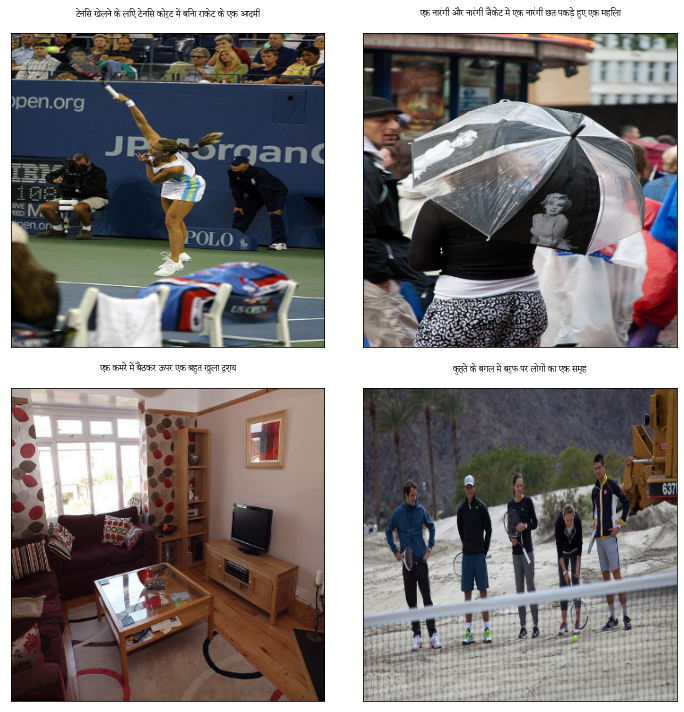

In [ ]:
# for visualizing validation data
import pandas as pd
from pathlib import Path
from matplotlib import font_manager as fm, rcParams
from IPython.core.display import HTML
fpath = os.path.join("Akshar Unicode.ttf")
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]
files_val = os.listdir('val2014/')
# Plot the validation images
fig = plt.figure(figsize=(10,10))
for i in range(4):
    img = imread('val2014/' + files_val[i])
    img = resize(img, (350,350))
    fig.add_subplot(2, 2, i + 1, xticks=[], yticks=[])
    plt.tight_layout()
    plt.imshow(img)
    plt.title(hindi[i]+'\n'.format(fname), fontproperties=prop)
    
plt.show()

In [ ]:
with open(r'captions.txt', 'w') as fp:
    for text in output_texts:
        # write each item on a new line
        fp.write("%s\n" % text)
    print('Done')
with open(r'hindi.txt', 'w') as fp:
    for text in hindi:
        # write each item on a new line
        fp.write("%s\n" % text)
    print('Done')

Done
Done


translation to telugu

In [ ]:
!gdown 1rTks4eOvBlgv-NCNCVzJwKyZUD3pgpC4

Downloading...
From: https://drive.google.com/uc?id=1rTks4eOvBlgv-NCNCVzJwKyZUD3pgpC4
To: /content/English-Telugu-20221127T191046Z-001.zip
100% 7.97M/7.97M [00:00<00:00, 23.9MB/s]


In [ ]:
!unzip English-Telugu-20221127T191046Z-001.zip

Archive:  English-Telugu-20221127T191046Z-001.zip
  inflating: English-Telugu/val.te   
  inflating: English-Telugu/val.en   
  inflating: English-Telugu/test.en  
  inflating: English-Telugu/test.te  
  inflating: English-Telugu/train.en  
  inflating: English-Telugu/train.te  


In [ ]:
!pip install -U "tensorflow==2.9.2"
!pip install -U "tensorflow-text==2.9.*"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 4.0 MB/s 


In [ ]:
!gdown 1hAZ0iEvHwEAxBM5H3G9uNzr6sYfO3k-C
!gdown 1ajmtZ22UXnCRpfNSbbnLwzHMJDo5pn12

Downloading...
From: https://drive.google.com/uc?id=1hAZ0iEvHwEAxBM5H3G9uNzr6sYfO3k-C
To: /content/captions.txt
100% 249k/249k [00:00<00:00, 124MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ajmtZ22UXnCRpfNSbbnLwzHMJDo5pn12
To: /content/hindi.txt
100% 1.26k/1.26k [00:00<00:00, 2.50MB/s]


In [ ]:
import collections
import logging
import os
import pathlib
import re
import string
import sys
import time
# import seaborn as sns
import pandas as pd
import tempfile
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow_text as text
import tensorflow as tf
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab
from tqdm import tqdm
import tensorflow_datasets as tfds

In [ ]:
with open("captions.txt", "r") as cap:
	output_texts = cap.read().split('\n')
output_texts.pop(-1)
with open("hindi.txt", "r") as cap:
	hindi = cap.read().split('\n')
hindi.pop(-1)
print(output_texts)
print(hindi)

['a man without a racquet on a tennis court playing tennis', 'a woman in a black and black jacket holding a black umbrella', 'a very open looking above sitting in a room', 'a group of people on the snow next to a dog', 'a young girl lays on a bed and hat from a yellow', 'a building with a steeple and a clock', 'an open toilet and toilet with a finger on it', 'a man holding a tennis racquet on top of a tennis court', 'a double decker bus parked in a city', 'a small and black photo of a wooden table with oranges in the room', 'a woman in <UNK> with a decorative mounted on a bed', 'a street at an intersection with a traffic sign in the background', 'a small bathroom with a toilet and sink', 'the cat is standing next to the window of the <UNK>', 'a boat in the middle of the dock as a dock with a girl and a dog holding a pole in back', 'a train on a track near many trees', 'a young woman sits in a pink room holding a big brown lid', 'a man riding a surf board down a wave', 'a person holding

In [ ]:
!nvidia-smi

Sat Dec  3 20:18:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# train_examples, val_examples = examples['train'], examples['validation']


with open('/content/English-Telugu/train.te', 'r', encoding="utf8") as f:
    te=[]
    for i in f.readlines():
        te.append(i)

with open('/content/English-Telugu/train.en', 'r', encoding="utf8") as f:
    en=[]
    for i in f.readlines():
        en.append(i)
data = pd.DataFrame(data=list(zip(en, te)), columns=['english','telugu'])
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase

def preprocess(text):
    # convert all the text into lower letters
    # use this function to remove the contractions: https://gist.github.com/anandborad/d410a49a493b56dace4f814ab5325bbd
    # remove all the spacial characters: except space ' '
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[$-)\"’°;\'€%:(/]', '', text)
    # text = re.sub('[^A-Za-z0-9 ]+', '', text)
    text = text.strip()
    return text

def preprocess_te(text):
    # convert all the text into lower letters
    # remove the words betweent brakets ()
    # remove these characters: {'$', ')', '?', '"', '’', '.',  '°', '!', ';', '/', "'", '€', '%', ':', ',', '('}
    # replace these spl characters with space: '\u200b', '\xa0', '-', '/'
    # we have found these characters after observing the data points, feel free to explore more and see if you can do find more
    # you are free to do more proprocessing
    # note that the model will learn better with better preprocessed data 
    
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[$)\"’°!;\'€%:(/]', '', text)
    # text = re.sub('\u200b', ' ', text)
    # text = re.sub('\u200e', ' ', text)
    # text = re.sub('\u200c', ' ', text)
    # text = re.sub('\u200d', ' ', text)
    # text = re.sub('\xa0', ' ', text)
    text = re.sub('\n', '', text)
    text = re.sub('-', ' ', text)
    text = re.sub(' +', " ",text)
    text = text.strip()
    return text

In [ ]:
def write_vocab_file(filepath, vocab):
  with open(filepath, 'w', encoding="utf-8") as f:
    for token in vocab:
      print(token, file=f)

In [ ]:
def create_vocabFile(path, saving_path):
    with open(path,'r', encoding="utf-8") as file:
        data=[]
        for i in tqdm(file.readlines()):
            data.append(i)
    dataset = tf.data.Dataset.from_tensor_slices(data)
    bert_tokenizer_params=dict(lower_case=True)
    reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]

    bert_vocab_args = dict(
        # The target vocabulary size
        vocab_size = 150000,
        # Reserved tokens that must be included in the vocabulary
        reserved_tokens=reserved_tokens,
        # Arguments for `text.BertTokenizer`
        bert_tokenizer_params=bert_tokenizer_params,
        # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    )
    english_vocab = bert_vocab.bert_vocab_from_dataset(dataset.batch(1000),**bert_vocab_args)
    write_vocab_file(saving_path, english_vocab)

In [ ]:
create_vocabFile('/content/English-Telugu/train.en', '/content/English-Telugu/english_vocab_all.txt')
#use preprocess_ita
create_vocabFile('/content/English-Telugu/train.te', '/content/English-Telugu/telugu_vocab_all.txt')

100%|██████████| 75000/75000 [00:00<00:00, 2299979.53it/s]


In [ ]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en', with_info=True,
                               as_supervised=True)
train_examples, val_examples = examples['train'], examples['validation']

train_en = train_examples.map(lambda pt, en: en)
train_pt = train_examples.map(lambda pt, en: pt)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/51785 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incomplete7CBL3N/ted_hrlr_translate-train.tf…

Generating validation examples...:   0%|          | 0/1193 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incomplete7CBL3N/ted_hrlr_translate-validati…

Generating test examples...:   0%|          | 0/1803 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incomplete7CBL3N/ted_hrlr_translate-test.tfr…

Dataset ted_hrlr_translate downloaded and prepared to ~/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0. Subsequent calls will reuse this data.


In [ ]:
data['english'] = data['english'].apply(preprocess)
data['telugu'] = data['telugu'].apply(preprocess_te)
data.head()

data['telugu_len'] = data['telugu'].str.split().apply(len)
data = data[data['telugu_len'] < 40]

data['english_len'] = data['english'].str.split().apply(len)
data = data[data['english_len'] < 40]
data = data.drop(['telugu_len','english_len'], axis=1)

In [ ]:
data

english  \
0       we just party , and we can do whatever we want .   
1      and ziza the son of shiphi , the son of allon ...   
2      now a poor wise man was found in it , and he b...   
3      and the child grew , and she brought him unto ...   
4               - i was at the jeweler and nobody came .   
...                                                  ...   
74994  yea , they spake against god they said , can g...   
74995                                    in the bunker .   
74996  the king is favor is toward a servant who deal...   
74997                      are you celebrating tonight ?   
74999                       how could you stand for it ?   

                                                  telugu  
0              మరియు మేము ఉండవు మేము పార్టీ చెయ్యవచ్చు .  
1      షెమయాకు పుట్టిన షిమీ కుమారుడైన యెదాయాకు పుట్టి...  
2      అయితే అందులో జ్ఞానముగల యొక బీదవాడుండి తన జ్ఞాన...  
3      ఆ బిడ్డ పెద్దవాడైన తరువాత ఆమె ఫరో కుమార్తె యొద...  
4               నేను స్వర్ణకారుడు ఉండేది వచ్చింది ఎవరూ .  
...                                                  ...  
74994  ఈ అరణ్యములో దేవుడు భోజనము సిద్ధపరచ గలడా యనుచు ...  
74995                                         బంకర్ లో .  
74996  బుద్ధిగల సేవకుడు రాజుల కిష్టుడు అవమానకరముగా నడ...  
74997                                మీరు రాత్రి వేడుక ?  
74999                      మీరు ఎలా నిలబడటానికి కాలేదు ?  

[64715 rows x 2 columns]

In [ ]:
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]
START = tf.argmax(tf.constant(reserved_tokens) == "[START]")
END = tf.argmax(tf.constant(reserved_tokens) == "[END]")

def add_start_end(ragged):
  count = ragged.bounding_shape()[0]
  starts = tf.fill([count,1], START)
  ends = tf.fill([count,1], END)
  return tf.concat([starts, ragged, ends], axis=1)

In [ ]:
def cleanup_text(reserved_tokens, token_txt):
  # Drop the reserved tokens, except for "[UNK]".
  bad_tokens = [re.escape(tok) for tok in reserved_tokens if tok != "[UNK]"]
  bad_token_re = "|".join(bad_tokens)

  bad_cells = tf.strings.regex_full_match(token_txt, bad_token_re)
  result = tf.ragged.boolean_mask(token_txt, ~bad_cells)

  # Join them into strings.
  result = tf.strings.reduce_join(result, separator=' ', axis=-1)

  return result

In [ ]:
class CustomTokenizer(tf.Module):
  def __init__(self, reserved_tokens, vocab_path):
    self.tokenizer = text.BertTokenizer(vocab_path, lower_case=True)
    self._reserved_tokens = reserved_tokens
    self._vocab_path = tf.saved_model.Asset(vocab_path)

    vocab = pathlib.Path(vocab_path).read_text(encoding="utf8").splitlines()
    self.vocab = tf.Variable(vocab)

    ## Create the signatures for export:   

    # Include a tokenize signature for a batch of strings. 
    self.tokenize.get_concrete_function(
        tf.TensorSpec(shape=[None], dtype=tf.string))

    # Include `detokenize` and `lookup` signatures for:
    #   * `Tensors` with shapes [tokens] and [batch, tokens]
    #   * `RaggedTensors` with shape [batch, tokens]
    self.detokenize.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.detokenize.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    self.lookup.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.lookup.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    # These `get_*` methods take no arguments
    self.get_vocab_size.get_concrete_function()
    self.get_vocab_path.get_concrete_function()
    self.get_reserved_tokens.get_concrete_function()

  @tf.function
  def tokenize(self, strings):
    enc = self.tokenizer.tokenize(strings)
    # Merge the `word` and `word-piece` axes.
    enc = enc.merge_dims(-2,-1)
    enc = add_start_end(enc)
    return enc

  @tf.function
  def detokenize(self, tokenized):
    words = self.tokenizer.detokenize(tokenized)
    return cleanup_text(self._reserved_tokens, words)

  @tf.function
  def lookup(self, token_ids):
    return tf.gather(self.vocab, token_ids)

  @tf.function
  def get_vocab_size(self):
    return tf.shape(self.vocab)[0]

  @tf.function
  def get_vocab_path(self):
    return self._vocab_path

  @tf.function
  def get_reserved_tokens(self):
    return tf.constant(self._reserved_tokens)

In [ ]:
tokenizers = tf.Module()
tokenizers.te = CustomTokenizer(reserved_tokens, '/content/English-Telugu/telugu_vocab_all.txt')
tokenizers.en = CustomTokenizer(reserved_tokens, '/content/English-Telugu/english_vocab_all.txt')

In [ ]:
model_name = '/content/English-Telugu/translate_en_te_converter_all'
tf.saved_model.save(tokenizers, model_name)

In [ ]:
reloaded_tokenizers = tf.saved_model.load(model_name)
reloaded_tokenizers.en.get_vocab_size().numpy()

6697

In [ ]:
train_examples =  tf.data.Dataset.from_tensor_slices((data['english'].values, data['telugu'].values))

In [ ]:
model_name = '/content/English-Telugu/translate_en_te_converter_all'
tokenizers = tf.saved_model.load(model_name)
vocab_inp_size = tokenizers.en.get_vocab_size().numpy()
vocab_tar_size = tokenizers.te.get_vocab_size().numpy()

In [ ]:
def tokenize_pairs(en,te):
    te = tokenizers.te.tokenize(te)
    # Convert from ragged to dense, padding with zeros.
    te = te.to_tensor()

    en = tokenizers.en.tokenize(en)
    # Convert from ragged to dense, padding with zeros.
    en = en.to_tensor()
    return en,te

In [ ]:
BUFFER_SIZE = 500000
BATCH_SIZE = 312

In [ ]:
def make_batches(ds):
  return (
      ds
      .cache()
      .batch(BATCH_SIZE)
      .map(tokenize_pairs, num_parallel_calls=tf.data.AUTOTUNE)
      .prefetch(tf.data.AUTOTUNE))


train_batches = make_batches(train_examples)
# val_batches = make_batches(val_examples)

In [ ]:
for i in train_examples:
  print(i)
  break

(<tf.Tensor: shape=(), dtype=string, numpy=b'we just party , and we can do whatever we want .'>, <tf.Tensor: shape=(), dtype=string, numpy=b'\xe0\xb0\xae\xe0\xb0\xb0\xe0\xb0\xbf\xe0\xb0\xaf\xe0\xb1\x81 \xe0\xb0\xae\xe0\xb1\x87\xe0\xb0\xae\xe0\xb1\x81 \xe0\xb0\x89\xe0\xb0\x82\xe0\xb0\xa1\xe0\xb0\xb5\xe0\xb1\x81 \xe0\xb0\xae\xe0\xb1\x87\xe0\xb0\xae\xe0\xb1\x81 \xe0\xb0\xaa\xe0\xb0\xbe\xe0\xb0\xb0\xe0\xb1\x8d\xe0\xb0\x9f\xe0\xb1\x80 \xe0\xb0\x9a\xe0\xb1\x86\xe0\xb0\xaf\xe0\xb1\x8d\xe0\xb0\xaf\xe0\xb0\xb5\xe0\xb0\x9a\xe0\xb1\x8d\xe0\xb0\x9a\xe0\xb1\x81 .'>)


In [ ]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [ ]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return tf.cast(pos_encoding, dtype=tf.float32)

In [ ]:
n, d = 2048, 512
pos_encoding = positional_encoding(n, d)
print(pos_encoding.shape)
pos_encoding = pos_encoding[0]

# Juggle the dimensions for the plot
pos_encoding = tf.reshape(pos_encoding, (n, d//2, 2))
pos_encoding = tf.transpose(pos_encoding, (2, 1, 0))
pos_encoding = tf.reshape(pos_encoding, (d, n))

plt.pcolormesh(pos_encoding, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

(1, 2048, 512)


In [ ]:
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)

  # add extra dimensions to add the padding
  # to the attention logits.
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [ ]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead)
  but it must be broadcastable for addition.

  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable
          to (..., seq_len_q, seq_len_k). Defaults to None.

  Returns:
    output, attention_weights
  """

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)

    self.dense = tf.keras.layers.Dense(d_model)

  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)

    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

    return output, attention_weights

In [ ]:
temp_mha = MultiHeadAttention(d_model=512, num_heads=8)
y = tf.random.uniform((1, 60, 512))  # (batch_size, encoder_sequence, d_model)
out, attn = temp_mha(y, k=y, q=y, mask=None)
out.shape, attn.shape

(TensorShape([1, 60, 512]), TensorShape([1, 8, 60, 60]))

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

In [ ]:
sample_ffn = point_wise_feed_forward_network(512, 2048)
sample_ffn(tf.random.uniform((64, 50, 512))).shape

TensorShape([64, 50, 512])

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

    return out2

In [ ]:
sample_encoder_layer = EncoderLayer(512, 8, 2048)

sample_encoder_layer_output = sample_encoder_layer(
    tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

TensorShape([64, 43, 512])

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)

  def call(self, x, enc_output, training,
           look_ahead_mask, padding_mask):
    # enc_output.shape == (batch_size, input_seq_len, d_model)

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)

    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

    return out3, attn_weights_block1, attn_weights_block2

In [ ]:
sample_decoder_layer = DecoderLayer(512, 8, 2048)

sample_decoder_layer_output, _, _ = sample_decoder_layer(
    tf.random.uniform((64, 50, 512)), sample_encoder_layer_output,
    False, None, None)

sample_decoder_layer_output.shape  # (batch_size, target_seq_len, d_model)

TensorShape([64, 50, 512])

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding,
                                            self.d_model)

    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate)
                       for _ in range(num_layers)]

    self.dropout = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]

    # adding embedding and position encoding.
    x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)

    return x  # (batch_size, input_seq_len, d_model)

In [ ]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8,
                         dff=2048, input_vocab_size=8500,
                         maximum_position_encoding=10000)
temp_input = tf.random.uniform((64, 62), dtype=tf.int64, minval=0, maxval=200)

sample_encoder_output = sample_encoder(temp_input, training=False, mask=None)

print(sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

(64, 62, 512)


In [ ]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate)
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)

  def call(self, x, enc_output, training,
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}

    x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)

      attention_weights[f'decoder_layer{i+1}_block1'] = block1
      attention_weights[f'decoder_layer{i+1}_block2'] = block2

    # x.shape == (batch_size, target_seq_len, d_model)
    return x, attention_weights

In [ ]:
sample_decoder = Decoder(num_layers=2, d_model=512, num_heads=8,
                         dff=2048, target_vocab_size=8000,
                         maximum_position_encoding=5000)
temp_input = tf.random.uniform((64, 26), dtype=tf.int64, minval=0, maxval=200)

output, attn = sample_decoder(temp_input,
                              enc_output=sample_encoder_output,
                              training=False,
                              look_ahead_mask=None,
                              padding_mask=None)

output.shape, attn['decoder_layer2_block2'].shape

(TensorShape([64, 26, 512]), TensorShape([64, 8, 26, 62]))

In [ ]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               target_vocab_size, pe_input, pe_target, rate=0.1):
    super(Transformer, self).__init__()

    self.tokenizer = Encoder(num_layers, d_model, num_heads, dff,
                             input_vocab_size, pe_input, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff,
                           target_vocab_size, pe_target, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inp, tar, training, enc_padding_mask,
           look_ahead_mask, dec_padding_mask):

    enc_output = self.tokenizer(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)

    # dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)

    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

    return final_output, attention_weights

In [ ]:
sample_transformer = Transformer(
    num_layers=2, d_model=512, num_heads=8, dff=2048,
    input_vocab_size=8500, target_vocab_size=8000,
    pe_input=10000, pe_target=6000)

temp_input = tf.random.uniform((64, 38), dtype=tf.int64, minval=0, maxval=200)
temp_target = tf.random.uniform((64, 36), dtype=tf.int64, minval=0, maxval=200)

fn_out, _ = sample_transformer(temp_input, temp_target, training=False,
                               enc_padding_mask=None,
                               look_ahead_mask=None,
                               dec_padding_mask=None)

fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)

TensorShape([64, 36, 8000])

In [ ]:
num_layers = 4
d_model = 512
dff = 1024
num_heads = 8
dropout_rate = 0.1

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)


def accuracy_function(real, pred):
  accuracies = tf.equal(real, tf.argmax(pred, axis=2))

  mask = tf.math.logical_not(tf.math.equal(real, 0))
  accuracies = tf.math.logical_and(mask, accuracies)

  accuracies = tf.cast(accuracies, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

In [ ]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=tokenizers.en.get_vocab_size(),
    target_vocab_size=tokenizers.te.get_vocab_size(),
    pe_input=100,
    pe_target=100,
    rate=dropout_rate)

In [ ]:
def create_masks(inp, tar):
  # Encoder padding mask
  enc_padding_mask = create_padding_mask(inp)

  # Used in the 2nd attention block in the decoder.
  # This padding mask is used to mask the encoder outputs.
  dec_padding_mask = create_padding_mask(inp)

  # Used in the 1st attention block in the decoder.
  # It is used to pad and mask future tokens in the input received by
  # the decoder.
  look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
  dec_target_padding_mask = create_padding_mask(tar)
  combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

  return enc_padding_mask, combined_mask, dec_padding_mask

In [ ]:
checkpoint_path = "/content/model_checkpoints/transformer_model_full2"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=3)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print('Latest checkpoint restored!!')

In [ ]:
EPOCHS = 30

In [ ]:
# The @tf.function trace-compiles train_step into a TF graph for faster
# execution. The function specializes to the precise shape of the argument
# tensors. To avoid re-tracing due to the variable sequence lengths or variable
# batch sizes (the last batch is smaller), use input_signature to specify
# more generic shapes.

train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]


@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]

  enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

  with tf.GradientTape() as tape:
    predictions, _ = transformer(inp, tar_inp,
                                 True,
                                 enc_padding_mask,
                                 combined_mask,
                                 dec_padding_mask)
    loss = loss_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

  train_loss(loss)
  train_accuracy(accuracy_function(tar_real, predictions))

In [ ]:
for epoch in range(EPOCHS):
  start = time.time()

  train_loss.reset_states()
  train_accuracy.reset_states()
 
  # inp -> english, tar -> Telugu
  for (batch, (inp, tar)) in enumerate(train_batches):
    train_step(inp, tar)

    if batch % 50 == 0:
      print(f'Epoch {epoch + 1} Batch {batch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

  if (epoch + 1) % 10 == 0:
    ckpt_save_path = ckpt_manager.save()
    print(f'Saving checkpoint for epoch {epoch+1} at {ckpt_save_path}')

  print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

  print(f'Time taken for 1 epoch: {time.time() - start:.2f} secs\n')

Epoch 1 Batch 0 Loss 9.5618 Accuracy 0.0002
Epoch 1 Batch 50 Loss 9.4061 Accuracy 0.0366
Epoch 1 Batch 100 Loss 9.2154 Accuracy 0.0486
Epoch 1 Batch 150 Loss 9.0374 Accuracy 0.0529
Epoch 1 Batch 200 Loss 8.8365 Accuracy 0.0622
Epoch 1 Loss 8.8075 Accuracy 0.0635
Time taken for 1 epoch: 218.29 secs

Epoch 2 Batch 0 Loss 7.9712 Accuracy 0.0973
Epoch 2 Batch 50 Loss 7.7814 Accuracy 0.1059
Epoch 2 Batch 100 Loss 7.6661 Accuracy 0.1120
Epoch 2 Batch 150 Loss 7.5886 Accuracy 0.1178
Epoch 2 Batch 200 Loss 7.5264 Accuracy 0.1220
Epoch 2 Loss 7.5178 Accuracy 0.1226
Time taken for 1 epoch: 203.86 secs

Epoch 3 Batch 0 Loss 7.2994 Accuracy 0.1334
Epoch 3 Batch 50 Loss 7.2180 Accuracy 0.1417
Epoch 3 Batch 100 Loss 7.1596 Accuracy 0.1435
Epoch 3 Batch 150 Loss 7.1008 Accuracy 0.1452
Epoch 3 Batch 200 Loss 7.0440 Accuracy 0.1468
Epoch 3 Loss 7.0355 Accuracy 0.1471
Time taken for 1 epoch: 204.21 secs

Epoch 4 Batch 0 Loss 6.8204 Accuracy 0.1467
Epoch 4 Batch 50 Loss 6.7466 Accuracy 0.1550
Epoch 4 Bat

In [ ]:
def evaluate(sentence, max_length=40):
  # inp sentence is portuguese, hence adding the start and end token
  sentence = tf.convert_to_tensor([sentence])
  sentence = tokenizers.en.tokenize(sentence).to_tensor()

  encoder_input = sentence

  # as the target is english, the first word to the transformer should be the
  # english start token.
  start, end = tokenizers.te.tokenize([''])[0]
  output = tf.convert_to_tensor([start])
  output = tf.expand_dims(output, 0)

  for i in range(max_length):
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
        encoder_input, output)

    # predictions.shape == (batch_size, seq_len, vocab_size)
    predictions, attention_weights = transformer(encoder_input,
                                                 output,
                                                 False,
                                                 enc_padding_mask,
                                                 combined_mask,
                                                 dec_padding_mask)

    # select the last word from the seq_len dimension
    predictions = predictions[:, -1:, :]  # (batch_size, 1, vocab_size)

    predicted_id = tf.argmax(predictions, axis=-1)

    # concatentate the predicted_id to the output which is given to the decoder
    # as its input.
    output = tf.concat([output, predicted_id], axis=-1)

    # return the result if the predicted_id is equal to the end token
    if predicted_id == end:
      break

  # output.shape (1, tokens)
  text = tokenizers.te.detokenize(output)[0]  # shape: ()

  tokens = tokenizers.te.lookup(output)[0]

  return text, tokens, attention_weights

In [ ]:
import nltk.translate.bleu_score as bleu
from tqdm import tqdm
blue=0
for i in tqdm(list(range(0,1000))):
    # pred, attn_weigh = predict(data['english'].values[i])
    sentence=data['english'].values[i]
    ref=data['telugu'].values[i]
    translated_text, translated_tokens, attention_weights = evaluate(sentence)
    # print(translated_text.numpy().decode("utf-8").split(), ref.split())

    blue+=bleu.sentence_bleu([ref.split()], translated_text.numpy().decode("utf-8").split())
print('Training BLEU score: {}'.format(blue/1000))

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use 

Training BLEU score: 0.0031917147313259226


In [ ]:
with open('/content//English-Telugu/val.te', 'r', encoding="utf8") as f:
    mly=[]
    for i in f.readlines():
        mly.append(i)

with open('/content/English-Telugu/val.en', 'r', encoding="utf8") as f:
    en=[]
    for i in f.readlines():
        en.append(i)
data_val = pd.DataFrame(data=list(zip(en, mly)), columns=['english','telugu'])


data_val['english'] = data_val['english'].apply(preprocess)
data_val['telugu'] = data_val['telugu'].apply(preprocess_te)

data_val['telugu_len'] = data_val['telugu'].str.split().apply(len)
data_val = data_val[data_val['telugu_len'] < 40]

data_val['english_len'] = data_val['english'].str.split().apply(len)
data_val = data_val[data_val['english_len'] < 40]
data_val = data_val.drop(['telugu_len','english_len'], axis=1)

In [ ]:
import nltk.translate.bleu_score as bleu
from tqdm import tqdm
blue=0
for i in tqdm(list(range(0,2594))):
    # pred, attn_weigh = predict(data['english'].values[i])
    sentence=data_val['english'].values[i]
    ref=data_val['telugu'].values[i]
    translated_text, translated_tokens, attention_weights = evaluate(sentence)
    # print(translated_text.numpy().decode("utf-8").split(), ref.split())

    blue+=bleu.sentence_bleu([ref.split()], translated_text.numpy().decode("utf-8").split())
print('Validation BLEU score: {}'.format(blue/2594))

100%|██████████| 2594/2594 [1:36:16<00:00,  2.23s/it]

Validation BLEU score: 0.0010684831461547286


In [ ]:
telugu = []
for i in range(10):
  sentence = output_texts[i]
  translated_text, translated_tokens, attention_weights = evaluate(sentence)
  telugu.append(translated_text.numpy().decode("utf-8"))

In [ ]:
print(telugu)

['ఒక మనుషయున ఆకరషంచడనక లక', 'ఒక మహళ బలక హంత ల ఒక గదదలత తుడుచుకన ముఖధరలు త గటటగ పటటుదలక', 'ఒక గదల చల పరుండయుండగ', 'ఒక మంచు కంత ల తునటవశంసం చసుకుంద .', 'ఒక చనన పలలక oneadery అలరం అధరయం', 'ఒక భవనం త ఒక pockling', 'ఒక తళక కలకలు ఒక తుండక', 'ఒక మయ పదధత కదదగ హటస పరవతమకలలన ఒక మనష హ పద తుమము .', 'డబుల ఒక డబుల కరసబుల taplumbles', 'ఒక చనన తుడుయలను ఒక బదధునక ఆయుధలు తసకన']


In [ ]:
!wget http://images.cocodataset.org/zips/val2014.zip

--2022-12-04 00:27:46--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.214.1, 52.216.245.196, 52.217.69.116, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.214.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  16.5MB/s    in 7m 14s  

2022-12-04 00:35:01 (14.6 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [ ]:
!unzip val2014.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2014/COCO_val2014_000000535608.jpg  
 extracting: val2014/COCO_val2014_000000279145.jpg  
 extracting: val2014/COCO_val2014_000000243495.jpg  
 extracting: val2014/COCO_val2014_000000225791.jpg  
 extracting: val2014/COCO_val2014_000000428067.jpg  
 extracting: val2014/COCO_val2014_000000059383.jpg  
 extracting: val2014/COCO_val2014_000000558498.jpg  
 extracting: val2014/COCO_val2014_000000376123.jpg  
 extracting: val2014/COCO_val2014_000000191304.jpg  
 extracting: val2014/COCO_val2014_000000171062.jpg  
 extracting: val2014/COCO_val2014_000000014549.jpg  
 extracting: val2014/COCO_val2014_000000121152.jpg  
 extracting: val2014/COCO_val2014_000000276596.jpg  
 extracting: val2014/COCO_val2014_000000029431.jpg  
 extracting: val2014/COCO_val2014_000000036349.jpg  
 extracting: val2014/COCO_val2014_000000502055.jpg  
 extracting: val2014/COCO_val2014_000000438848.jpg  
 extracting: val2014/COCO_val2014_000000364973.j

In [ ]:
!gdown 1XrQHeWqMPJDF_LsaVRBC-Frs98suA-yb

Downloading...
From: https://drive.google.com/uc?id=1XrQHeWqMPJDF_LsaVRBC-Frs98suA-yb
To: /content/Gidugu.ttf
100% 231k/231k [00:00<00:00, 128MB/s]


In [ ]:
# for visualizing validation data
import pandas as pd
from pathlib import Path
from matplotlib import font_manager as fm, rcParams
from IPython.core.display import HTML
from skimage.io import imread
from skimage.transform import resize
fpath = os.path.join("Gidugu.ttf")
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]
files_val = os.listdir('val2014/')
# Plot the validation images
fig = plt.figure(figsize=(10,10))
for i in range(4):
    img = imread('val2014/' + files_val[i])
    img = resize(img, (350,350))
    fig.add_subplot(2, 2, i + 1, xticks=[], yticks=[])
    plt.tight_layout()
    plt.imshow(img)
    plt.title(telugu[i]+'\n'.format(fname), fontproperties=prop)
    
plt.show()

In [ ]:
with open(r'telugu.txt', 'w') as fp:
    for text in telugu:
        # write each item on a new line
        fp.write("%s\n" % text)
    print('Done')

Done
